In [4]:
using MatrixProductBP, MatrixProductBP.Models
using Plots, LaTeXStrings
import ProgressMeter; ProgressMeter.ijulia_behavior(:clear);

In [5]:
T = 50         # final time
k = 3          # degree
γ = 0.5       # prob. of zero patient
λ = 0.2        # rate of transmission
ρ = 0.2        # rate of recovery

0.2

In [6]:
wᵢ = fill(GenericFactor(SISFactor(λ, ρ)), T + 1)
ϕᵢ = [ t == 0 ? [1-γ, γ] : ones(2) for t in 0:T]
bp = periodic_mpbp_infinite_graph(k, wᵢ, 2, ϕᵢ)
cb = CB_BP(bp);

In [7]:
A0 = reshape([0.31033984998979236 0.31033984998979214; 0.18966015001020783 0.1896601500102077], 1,1,2,2)
for t in 1:T+1
    bp.μ[1].tensors[t] = A0 
end

In [8]:
# function CB(bp)
#     cb = CB_BP(bp)
#     aux = deepcopy(bp.μ)
#     matrixdiff = []
#     function cb_matrixconvergence(bp, it, svd_trunc)
#         Δ = cb(bp, it, svd_trunc)
#         diff = [norm(A)^2 + norm(B)^2 - 2*dot(A, B) for (A, B) in zip(bp.μ, aux)]
#         push!(matrixdiff, diff)
#         aux = deepcopy(bp.μ)
#         Δ
#     end
#     cb, cb_matrixconvergence, matrixdiff
# end

In [9]:
svd_trunc = TruncBond(8)
maxiter = 200
tol = 1e-5
iters, cb = iterate!(bp; maxiter, svd_trunc, cb, tol);

Running MPBP: iter 2    Time: 0:01:09

Running MPBP: iter 3    Time: 0:01:47

Running MPBP: iter 4    Time: 0:02:25

Running MPBP: iter 5    Time: 0:03:03

Running MPBP: iter 6    Time: 0:03:43

Running MPBP: iter 7    Time: 0:04:19

Running MPBP: iter 8    Time: 0:04:59

Running MPBP: iter 9    Time: 0:05:36

Running MPBP: iter 10    Time: 0:06:13

Running MPBP: iter 11    Time: 0:06:48

Running MPBP: iter 12    Time: 0:07:24

Running MPBP: iter 13    Time: 0:08:01

Running MPBP: iter 14    Time: 0:08:37

Running MPBP: iter 15    Time: 0:09:15

Running MPBP: iter 16    Time: 0:09:52

Running MPBP: iter 17    Time: 0:10:30

Running MPBP: iter 18    Time: 0:11:05

Running MPBP: iter 19    Time: 0:11:40

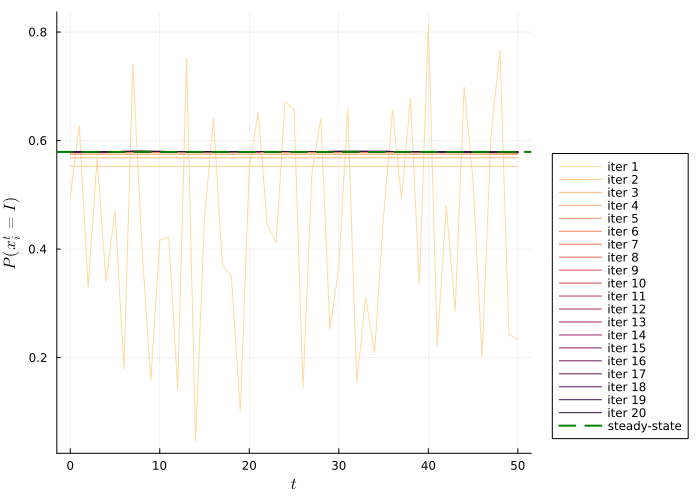

In [41]:
using Statistics, ColorSchemes
ps = [map(x->x-1, only(m)) for m in cb.m]

cg = cgrad(:matter, length(ps)+1, categorical=true)
pl = plot(; xlabel=L"t", ylabel=L"P(x_i^t=I)", label="",
    size=(700,500), xticks=0:10:T, ms=2,titlefontsize=9, legend=:outerbottomright)
for i in eachindex(ps)
    plot!(pl, 0:T, ps[i], c=cg[i+1], label="iter $i")
end
hline!(pl, [p_ss], c=:green, lw=2, label="steady-state", ls=:dash)
savefig(pl, "convergence_periodic.pdf")
pl

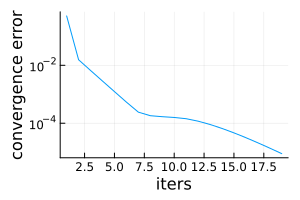

In [11]:
plot(cb.Δs, ylabel="convergence error", xlabel="iters", yaxis=:log10, size=(300,200), label="")

In [12]:
b = only(beliefs(bp));

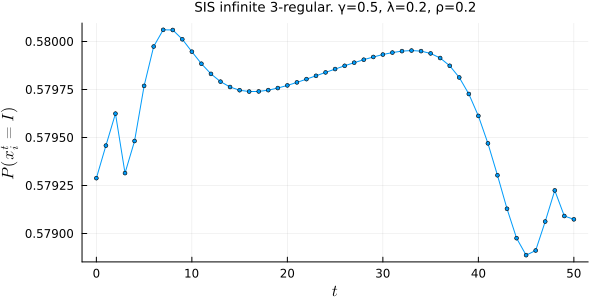

In [13]:
marg = [bᵗ[INFECTIOUS] for bᵗ in b]
pl_marg = plot(0:T, marg, m=:o, xlabel=L"t", ylabel=L"P(x_i^t=I)", label="",
    size=(600,300), xticks=0:10:T, ms=2,titlefontsize=9,
    title = "SIS infinite $k-regular. γ=$γ, λ=$λ, ρ=$ρ")

In [26]:
using TensorTrains

A = bp.μ[1].tensors[t]
p = TensorTrains.UniformTensorTrains.InfiniteUniformTensorTrain(A)
real(marginals(p))

1-element Vector{Matrix{Float64}}:
 [0.21076832241118407 0.21120188045282365; 0.28901489856799617 0.2890148985679962]

In [30]:
show(A)

[-0.08803999989318015 0.11908673164283345 -0.00866143517897221 -0.0001944318856584548 -0.00029458610445390576 1.150161703507817e-5 -8.49308502956596e-6 6.675400208946711e-7; 0.20453231906396488 -0.3502068177938542 -0.011166127709168435 0.0015560569397961718 -0.00045558652646957346 -7.779512791920681e-5 -1.3947176900371439e-5 -2.7488473863385137e-6; -0.23381515575527703 -0.19597064712628876 -0.28507990885249807 0.012465621740086882 0.01160482671932344 0.00048724543868394944 0.00019007315577420893 -0.00019764372955699078; -0.013850457559044339 -0.00805830696042479 0.051835723744016536 -0.010542722255135084 -0.028604466045398784 -0.0019221993853778762 -0.0014356097722578436 -0.0013851949495565404; -0.19445832145723468 -0.15194120588339183 0.2684724324006429 -0.048624601815316026 -0.25701764970953633 -0.010355769788741476 0.012031973011855032 0.00021661419505739698; -0.012535541664127885 -0.009499487766266532 0.016595672328106995 -0.05309194287803474 -0.007811176929565874 -0.01622335503939

In [28]:
marginals(bp.μ[1])[t]

2×2 Matrix{Float64}:
 0.210498  0.210501
 0.2895    0.2895

In [59]:
p_ss_periodic = marg[end]

0.5790736685580935

In [37]:
p_ss = marg[end]

0.5790736685580935

In [50]:
A0_periodic = marginals(only(bp.μ))

51-element Vector{Matrix{Float64}}:
 [0.2106319418090456 0.21063562778593906; 0.28936621520250777 0.2893662152025077]
 [0.21058710345661968 0.21059127370342848; 0.2894108114199759 0.28941081141997593]
 [0.21053153213745954 0.210535679517878; 0.2894663941723311 0.2894663941723312]
 [0.21062370230679228 0.2106271563324622; 0.28937457068037276 0.28937457068037264]
 [0.2105664358567168 0.2105691438900859; 0.28943221012659875 0.28943221012659864]
 [0.21047500085285129 0.21047713138389929; 0.28952393388162473 0.2895239338816248]
 [0.21041304684912693 0.21041480843709923; 0.28958607235688666 0.28958607235688705]
 [0.210391087128456 0.21039263116921375; 0.2896081408511652 0.28960814085116504]
 [0.2103971062806849 0.21039852183175467; 0.2896021859437804 0.28960218594378]
 [0.21041667617426382 0.21041800587787998; 0.289582658973928 0.2895826589739281]
 ⋮
 [0.21065684021750358 0.21059607015522389; 0.28937354481363636 0.28937354481363614]
 [0.21069570076789154 0.21063395014945682; 0.28933517454132

In [58]:
A0

2×2 Matrix{Float64}:
 0.210907  0.210651
 0.289221  0.289221

In [49]:
using TensorCast

function pair_belief(A)
    @cast _[(aᵗ,bᵗ),(aᵗ⁺¹,bᵗ⁺¹),xᵢᵗ,xⱼᵗ] := A[aᵗ,aᵗ⁺¹,xᵢᵗ, xⱼᵗ] * A[bᵗ,bᵗ⁺¹,xⱼᵗ,xᵢᵗ]
end
# belief(A) = sum(pair_belief(A), dims=(1,2,3)) |> vec
function belief(A)
    q = TensorTrains.UniformTensorTrains.InfiniteUniformTensorTrain(A)
    bij = marginals(q) |> only |> real
    sum(bij, dims=2) |> vec
end

b = belief(A)
b ./= sum(b)
b[1], p_ss

(0.42197020286400744, 0.5790736685580935)